In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import random as r
from timeit import default_timer as timer

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Model training

In [2]:
import pandas as pd
data= pd.read_csv('/content/drive/My Drive/Colab Notebooks/nt_toolbox/data/gisette_train.data',sep=" ", header=None)
print(data.shape)
data.head() # Preview Data

(6000, 5001)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,550,0,495,0,0,0,0,976,0,0,0,0,983,0,995,0,983,0,0,983,0,0,0,0,0,983,0,0,0,0,0,0,0,0,0,0,0,0,991,983,...,0,0,513,0,533,811,0,0,0,983,0,0,0,0,0,983,991,0,0,0,983,0,0,0,0,0,0,0,0,0,0,0,991,991,0,0,0,0,983,NaN
1,0,0,0,0,0,0,0,976,0,0,0,0,0,0,584,0,0,0,0,0,0,0,0,0,0,983,0,0,0,0,0,0,0,0,0,898,0,0,0,0,...,0,0,932,0,0,764,828,0,0,0,983,0,0,0,0,0,991,0,0,0,0,0,0,0,0,0,0,0,0,0,475,0,991,0,0,991,0,0,0,NaN
2,0,0,0,0,0,0,0,0,0,0,0,0,983,0,995,983,976,0,0,0,0,0,0,0,0,983,0,742,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,991,0,0,991,0,0,0,0,0,0,0,0,0,0,584,0,0,0,0,0,940,0,0,0,0,0,616,0,0,0,0,0,0,0,0,0,0,NaN
3,0,0,742,0,0,0,0,684,0,956,0,0,983,0,991,816,983,0,0,0,0,0,0,0,0,685,0,767,0,0,0,0,0,0,991,0,0,0,0,0,...,0,0,748,0,0,729,0,991,0,808,0,0,0,0,0,0,991,0,874,0,859,0,0,0,0,0,0,0,0,0,0,0,0,0,0,674,0,0,838,NaN
4,0,0,0,0,0,0,0,608,0,979,0,0,0,0,972,0,0,0,0,0,0,0,0,480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,991,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,675,780,0,0,0,0,983,0,0,0,0,0,991,0,0,828,0,0,0,0,0,0,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 5001 entries, 0 to 5000
dtypes: float64(1), int64(5000)
memory usage: 228.9 MB


In [4]:
label= pd.read_csv('/content/drive/My Drive/Colab Notebooks/nt_toolbox/data/gisette_train.labels',sep=" ", header=None)
label.head()

,0
0,1
1,-1
2,1
3,1
4,1


In [0]:
gisette_train = '/content/drive/My Drive/Colab Notebooks/nt_toolbox/data/gisette_train.data'
data=np.loadtxt(gisette_train, unpack=True)
gisette_label = '/content/drive/My Drive/Colab Notebooks/nt_toolbox/data/gisette_train.labels'
label=np.loadtxt(gisette_label, unpack=True)

### Subgradient descent method

In [0]:
#Converting the data to X and Y
A=np.transpose(data[:-1])
#print(A)
(n,m)=A.shape
Y=np.transpose(label)
#print(A.shape)
T=[[0 for x in range(m+1)] for y in range(n)]
X=np.array(T)
#print(X.shape)
#print(X[1][:].shape)
for i in range(n):
    for j in range(m):
        X[i][j]=A[i][j]
for i in range(n):
    X[i][m]=1
#print(X)

In [0]:
#Choosing a subgradient
def subdiff(w,matrix,u,col):
    (n,m)= matrix.shape
    v=0.00000001*w
    for i in range(n):
        c = col[i]*np.matmul(np.transpose(w),matrix[i][:])
        if (1-c)<0:
            u=np.zeros(m)
        elif (1-c)>0:
            u=-col[i]*np.transpose(matrix[i][:])
        else:
            u=-r.randrange(-1,1)*col[i]*np.transpose(matrix[i][:])
        v +=1/n*u
    return v

In [0]:
def fvalue(matrix,col,w):
    (n,m)=matrix.shape
    v=0.00000001/2*np.linalg.norm(w,ord=2)**2
    for i in range(n):
        v += 1/n*max(0, 1-col[i]*np.matmul(np.transpose(w),matrix[i][:]))
    return v

In [0]:
## Subgradient descent method
def regress(matrix,col):
    (n,m)= matrix.shape
    u = [1 for i in range (m)]
    w = np.ones(m)
    fbest=100*np.ones(1001)
    a=np.ones(m)
    value=np.ones(1000)
    for i in range(1000):
        v=subdiff(w,matrix,u,col) #choose a subgradient
        w += -1/np.sqrt(i+1)*v# x^{k+1}=x^k-f(x^k)/(norm(v)^2)*v
        value[i]=fvalue(X,Y,w) #compute f(x^{k+1})
        if value[i]<fbest[i]:#store fbest
            fbest[i+1]=value[i]
            a+=-a+w
        else:
            fbest[i+1]=fbest[i]
    return (a, w, value, fbest)

time= 234.35861358300008
value= [3.06235557e+07 9.04679362e+06 2.41936081e+06 3.83320573e+06
 1.57512322e+06 5.60149137e+05 3.41804471e+05 3.19089953e+05
 3.00585882e+05 2.84607338e+05 2.70637582e+05 2.58065609e+05
 2.46479431e+05 2.36068000e+05 2.26537012e+05 2.17670484e+05
 2.09461632e+05 2.01800660e+05 1.94656991e+05 1.87965917e+05
 1.81759454e+05 1.75967216e+05 1.70642139e+05 1.65664851e+05
 1.61104178e+05 1.56901179e+05 1.52865699e+05 1.49053774e+05
 1.45442206e+05 1.42074379e+05 1.38930207e+05 1.35951467e+05
 1.33110467e+05 1.30388956e+05 1.27819510e+05 1.25376565e+05
 1.23036548e+05 1.20789004e+05 1.18642074e+05 1.16632321e+05
 1.14710102e+05 1.12869387e+05 1.11095404e+05 1.09368315e+05
 1.07677337e+05 1.06066859e+05 1.04530465e+05 1.03050354e+05
 1.01613225e+05 1.00227780e+05 9.88987529e+04 9.75899680e+04
 9.63159380e+04 9.50681565e+04 9.38339799e+04 9.26163937e+04
 9.14347965e+04 9.02951570e+04 8.91816548e+04 8.80993482e+04
 8.70552707e+04 8.60452691e+04 8.50673150e+04 8.41102

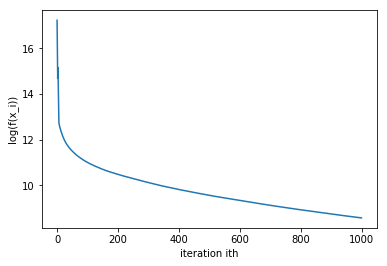

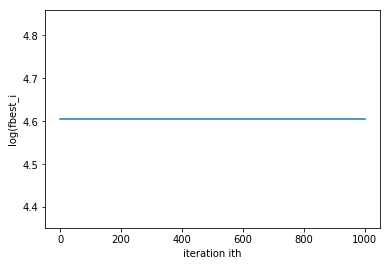

In [10]:
start = timer()
(wbest,gdm,value, fbest)=regress(X,Y)
end = timer()
print('time=',end - start)
#print('x=',x)
print('value=',value)
print('fbest=',fbest)
import matplotlib.pyplot as plt
plt.plot(np.log(value))
plt.xlabel('iteration ith')
plt.ylabel('log(f(x_i))')
plt.show()
plt.plot(np.log(fbest))
plt.xlabel('iteration ith')
plt.ylabel('log(fbest_i')
plt.show()

### Stochastic gradient descent method

In [0]:
def subdiffsto(w,matrix,col):
    (n,m)=X.shape
    c = col*np.matmul(np.transpose(w),matrix)
    if (1-c)<0:
        u=np.zeros(m)
    elif (1-c)>0:
        u=-col*np.transpose(matrix)
    else:
        u=-r.randrange(-1,1)*col*np.transpose(matrix)
    v =u+0.00001*w
    return v

In [0]:
##Stochastic subgradient descent method
def storegress(matrix,col):
    (n,m)= matrix.shape
    w=np.ones(m)
    fbest=100*np.ones(501)
    a=np.ones(m)
    value=np.ones(500)
    for i in range(500):
        j=r.randint(0,n-1) #choose randomly j in [0,n-1]
        v=subdiffsto(w,matrix[j][:],col[j]) #choose a subgradient of |a_j'x-b_j|
        w += -1/np.sqrt(i+1)*v #x^{k+1}=x^k-1/(norm(v)*sqrt(i+1))*v
        value[i]=fvalue(X,Y,w)#compute f(x^{k+1})
        if value[i]<fbest[i]:#store fbest
            fbest[i+1]=value[i]
            a=-a+w
        else:
            fbest[i+1]=fbest[i]
    return (a, w, value, fbest)


time= 47.230381539000064


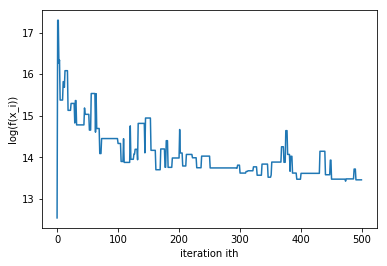

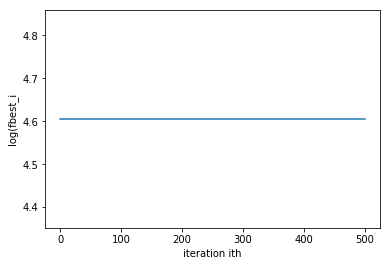

In [16]:
start = timer()
(wstobest,stogdm,value, fbest)=storegress(X,Y)
end = timer()
print('time=',end - start)
#print('x=',x)
#print('value=',value)
#print('fbest=',fbest)
import matplotlib.pyplot as plt
plt.plot(np.log(value))
plt.xlabel('iteration ith')
plt.ylabel('log(f(x_i))')
plt.show()
plt.plot(np.log(fbest))
plt.xlabel('iteration ith')
plt.ylabel('log(fbest_i')
plt.show()

## Model testing

In [0]:
gisette_test = '/content/drive/My Drive/Colab Notebooks/nt_toolbox/data/gisette_valid.data'
datatest=np.loadtxt(gisette_test, unpack=True)
#prettyP(data)
data.shape
test_label='/content/drive/My Drive/Colab Notebooks/nt_toolbox/data/gisette_valid.labels'
labeltest=np.loadtxt(test_label, unpack=True)

In [18]:
B=np.transpose(datatest[:-1])
(n,m)=B.shape
print(B.shape)
C=np.transpose(labeltest)
Test=[[0 for x in range(m+1)] for y in range(n)]
Xtest=np.array(Test)
for i in range(n):
    for j in range(m):
        Xtest[i][j]=B[i][j]
for i in range(n):
    Xtest[i][m]=1
#prettyP(Xtest)

(1000, 4999)


In [19]:
y1=np.matmul(Xtest,gdm)
y2=np.matmul(Xtest,stogdm)
for i in range(n):
    if y1[i]>0:
        y1[i]=1
    else:
        y1[i]=-1
for i in range(n):
    if y2[i]>0:
        y2[i]=1
    else:
        y2[i]=-1
print(y1)
print(y2)
count1=0
for i in range(n):
    if y1[i]==C[i]:
        count1+=1
eff1=count1/n
count2=0
for i in range(n):
    if y2[i]==C[i]:
        count2+=1
eff2=count2/n
print('efficientcy1=',eff1)
print('efficientcy2=',eff2)

[ 1.  1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1.  1. -1.  1.  1.  1.
  1.  1. -1.  1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1.
 -1.  1. -1. -1.  1. -1.  1.  1. -1. -1.  1. -1.  1. -1. -1. -1. -1. -1.
  1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1. -1.  1.  1.  1.  1. -1. -1.
 -1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1.  1.
  1. -1. -1. -1.  1. -1.  1. -1. -1.  1. -1. -1.  1.  1.  1.  1. -1.  1.
  1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1.  1. -1. -1.
  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1.
 -1.  1. -1.  1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1.  1. -1.
  1. -1.  1. -1. -1. -1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1. -1.
 -1.  1. -1. -1. -1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1. -1.
  1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1. -1.  1.  1. -1. -1.
  1. -1.  1. -1.  1.  1. -1.  1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1.
 -1. -1. -1.  1. -1.  1.  1. -1. -1. -1. -1.  1.  1